 ## Classification Case study - Mushroom Dataset

DATA DESCRIPTION: This dataset includes descriptions of hypothetical samples corresponding to 23 species of gilled mushrooms in the Agaricus and Lepiota Family Mushroom drawn from The Audubon Society Field Guide to North American Mushrooms (1981). Each species is identified as definitely edible, definitely poisonous, or of unknown edibility and not recommended. This latter class was combined with the poisonous one. The Guide clearly states that there is no simple rule for determining the edibility of a mushroom; no rule like "leaflets three, let it be'' for Poisonous Oak and Ivy.

In [1]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import statsmodels.stats as sm
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB

from sklearn.metrics import roc_auc_score, roc_curve, accuracy_score, confusion_matrix, classification_report, cohen_kappa_score
from sklearn.preprocessing import StandardScaler
from warnings import filterwarnings
filterwarnings('ignore')

In [2]:
df= pd.read_csv('mushrooms.csv')
df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [3]:
df.shape

(8124, 23)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

In [5]:
df.describe().T

,count,unique,top,freq
class,8124,2,e,4208
cap-shape,8124,6,x,3656
cap-surface,8124,4,y,3244
cap-color,8124,10,n,2284
bruises,8124,2,f,4748
odor,8124,9,n,3528
gill-attachment,8124,2,f,7914
gill-spacing,8124,2,c,6812
gill-size,8124,2,b,5612
gill-color,8124,12,b,1728


e    4208
p    3916
Name: class, dtype: int64
Axes(0.22375,0.11;0.5775x0.77)
x    3656
f    3152
k     828
b     452
s      32
c       4
Name: cap-shape, dtype: int64
Axes(0.22375,0.11;0.5775x0.77)
y    3244
s    2556
f    2320
g       4
Name: cap-surface, dtype: int64
Axes(0.22375,0.11;0.5775x0.77)
n    2284
g    1840
e    1500
y    1072
w    1040
b     168
p     144
c      44
u      16
r      16
Name: cap-color, dtype: int64
Axes(0.22375,0.11;0.5775x0.77)
f    4748
t    3376
Name: bruises, dtype: int64
Axes(0.22375,0.11;0.5775x0.77)
n    3528
f    2160
y     576
s     576
a     400
l     400
p     256
c     192
m      36
Name: odor, dtype: int64
Axes(0.22375,0.11;0.5775x0.77)
f    7914
a     210
Name: gill-attachment, dtype: int64
Axes(0.22375,0.11;0.5775x0.77)
c    6812
w    1312
Name: gill-spacing, dtype: int64
Axes(0.22375,0.11;0.5775x0.77)
b    5612
n    2512
Name: gill-size, dtype: int64
Axes(0.22375,0.11;0.5775x0.77)
b    1728
p    1492
w    1202
n    1048
g     752
h     732
u

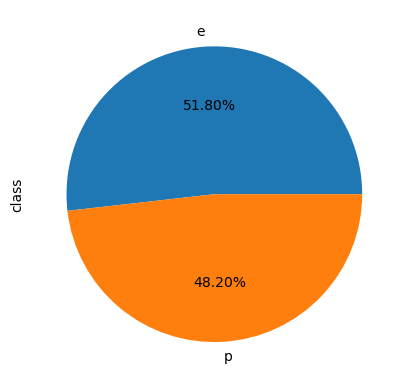

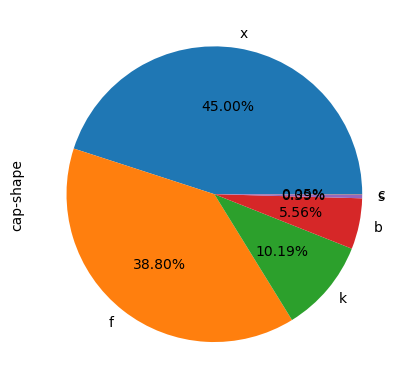

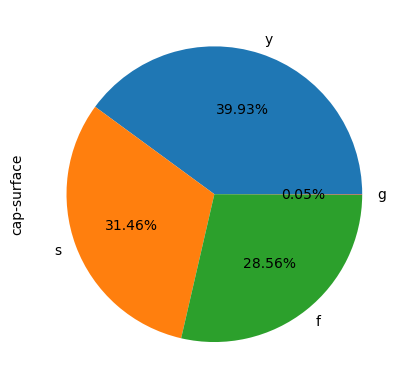

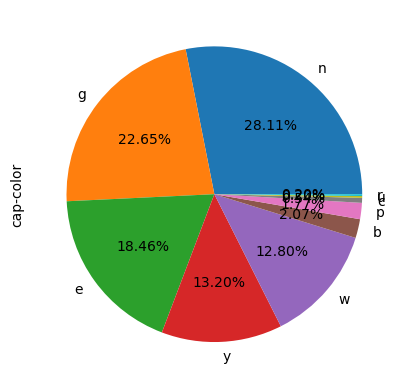

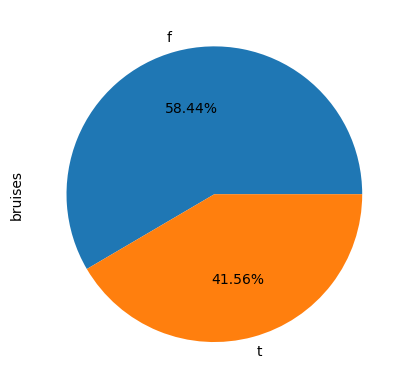

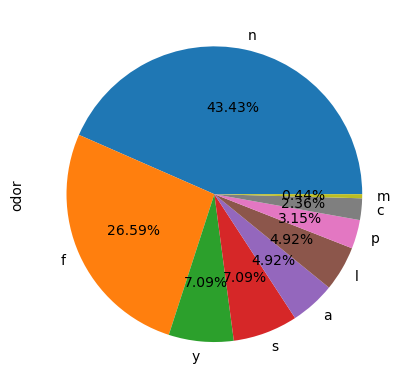

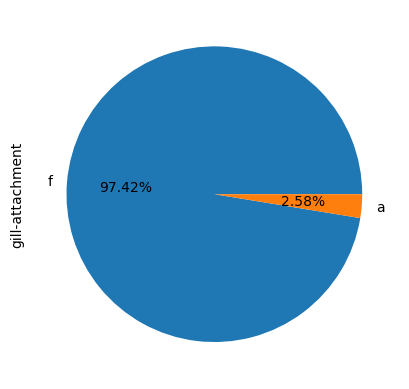

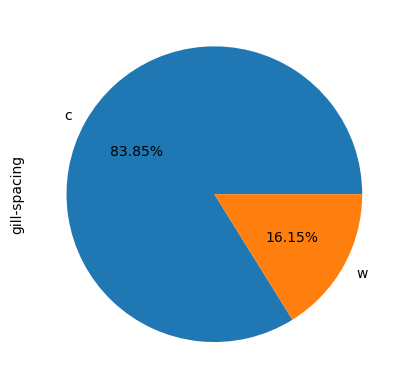

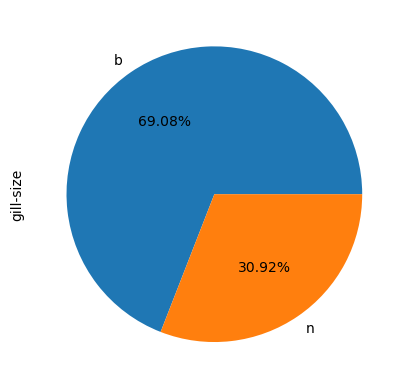

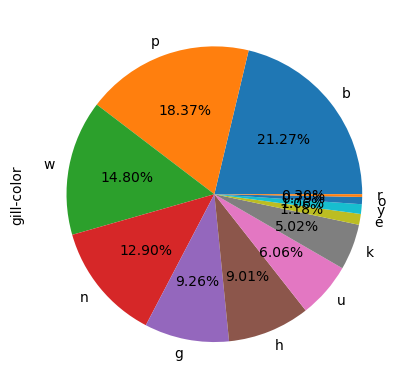

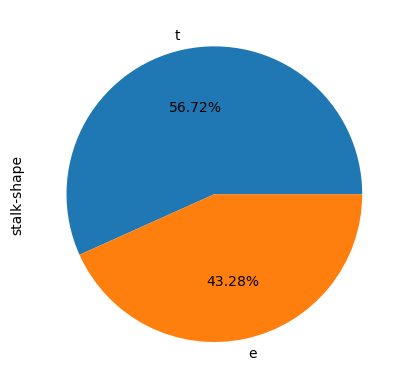

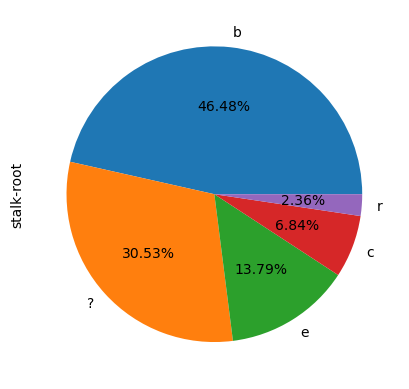

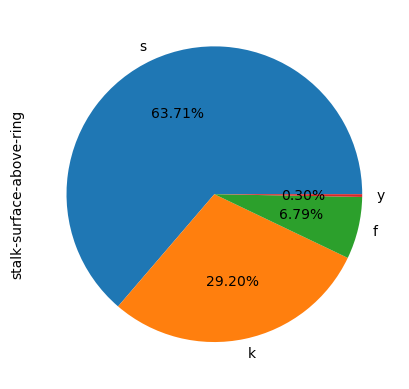

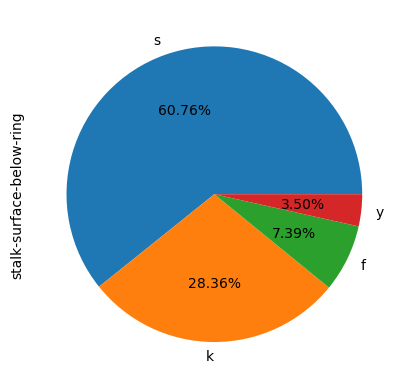

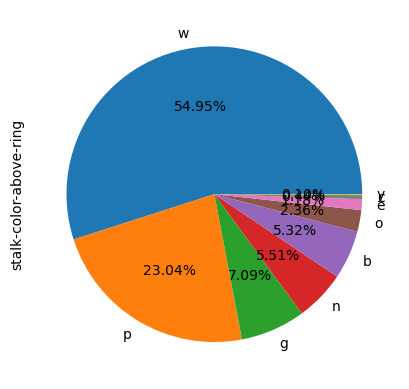

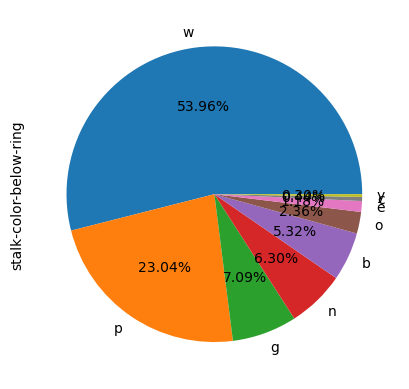

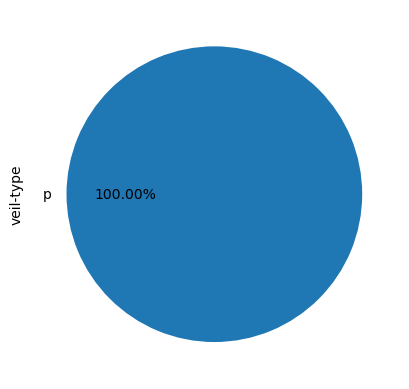

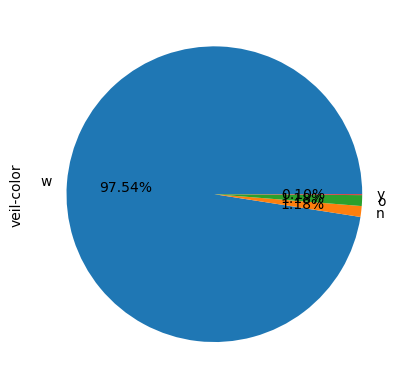

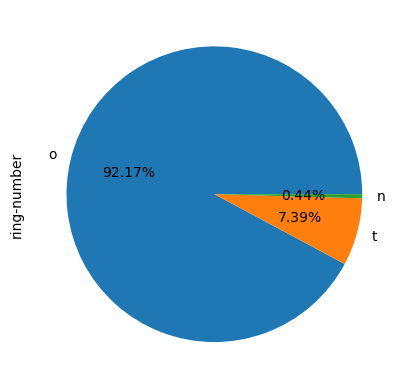

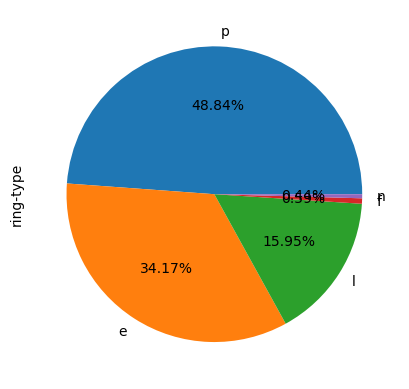

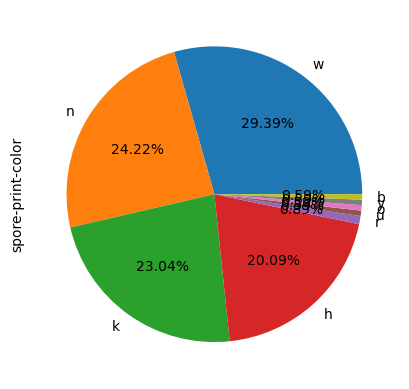

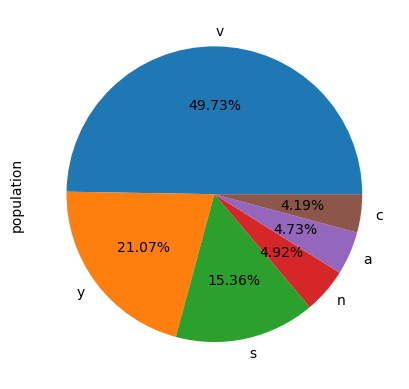

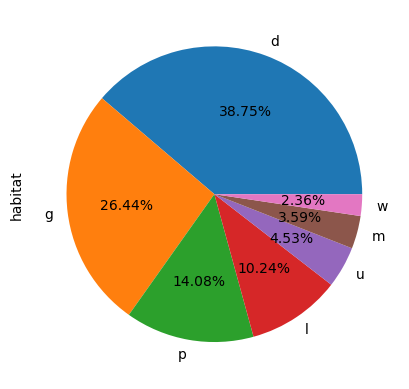

In [6]:
for i in df.columns:
    print(df[i].value_counts())
    plt.figure()
    print(df[i].value_counts().plot(kind='pie',autopct='%1.2f%%'))

In [7]:
# Missing value count
df.isnull().sum()

class                       0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64

#### Outliers
As all are categorical columns will not be able to detect outliers however value_counts show that few categories have very small proportion in category.

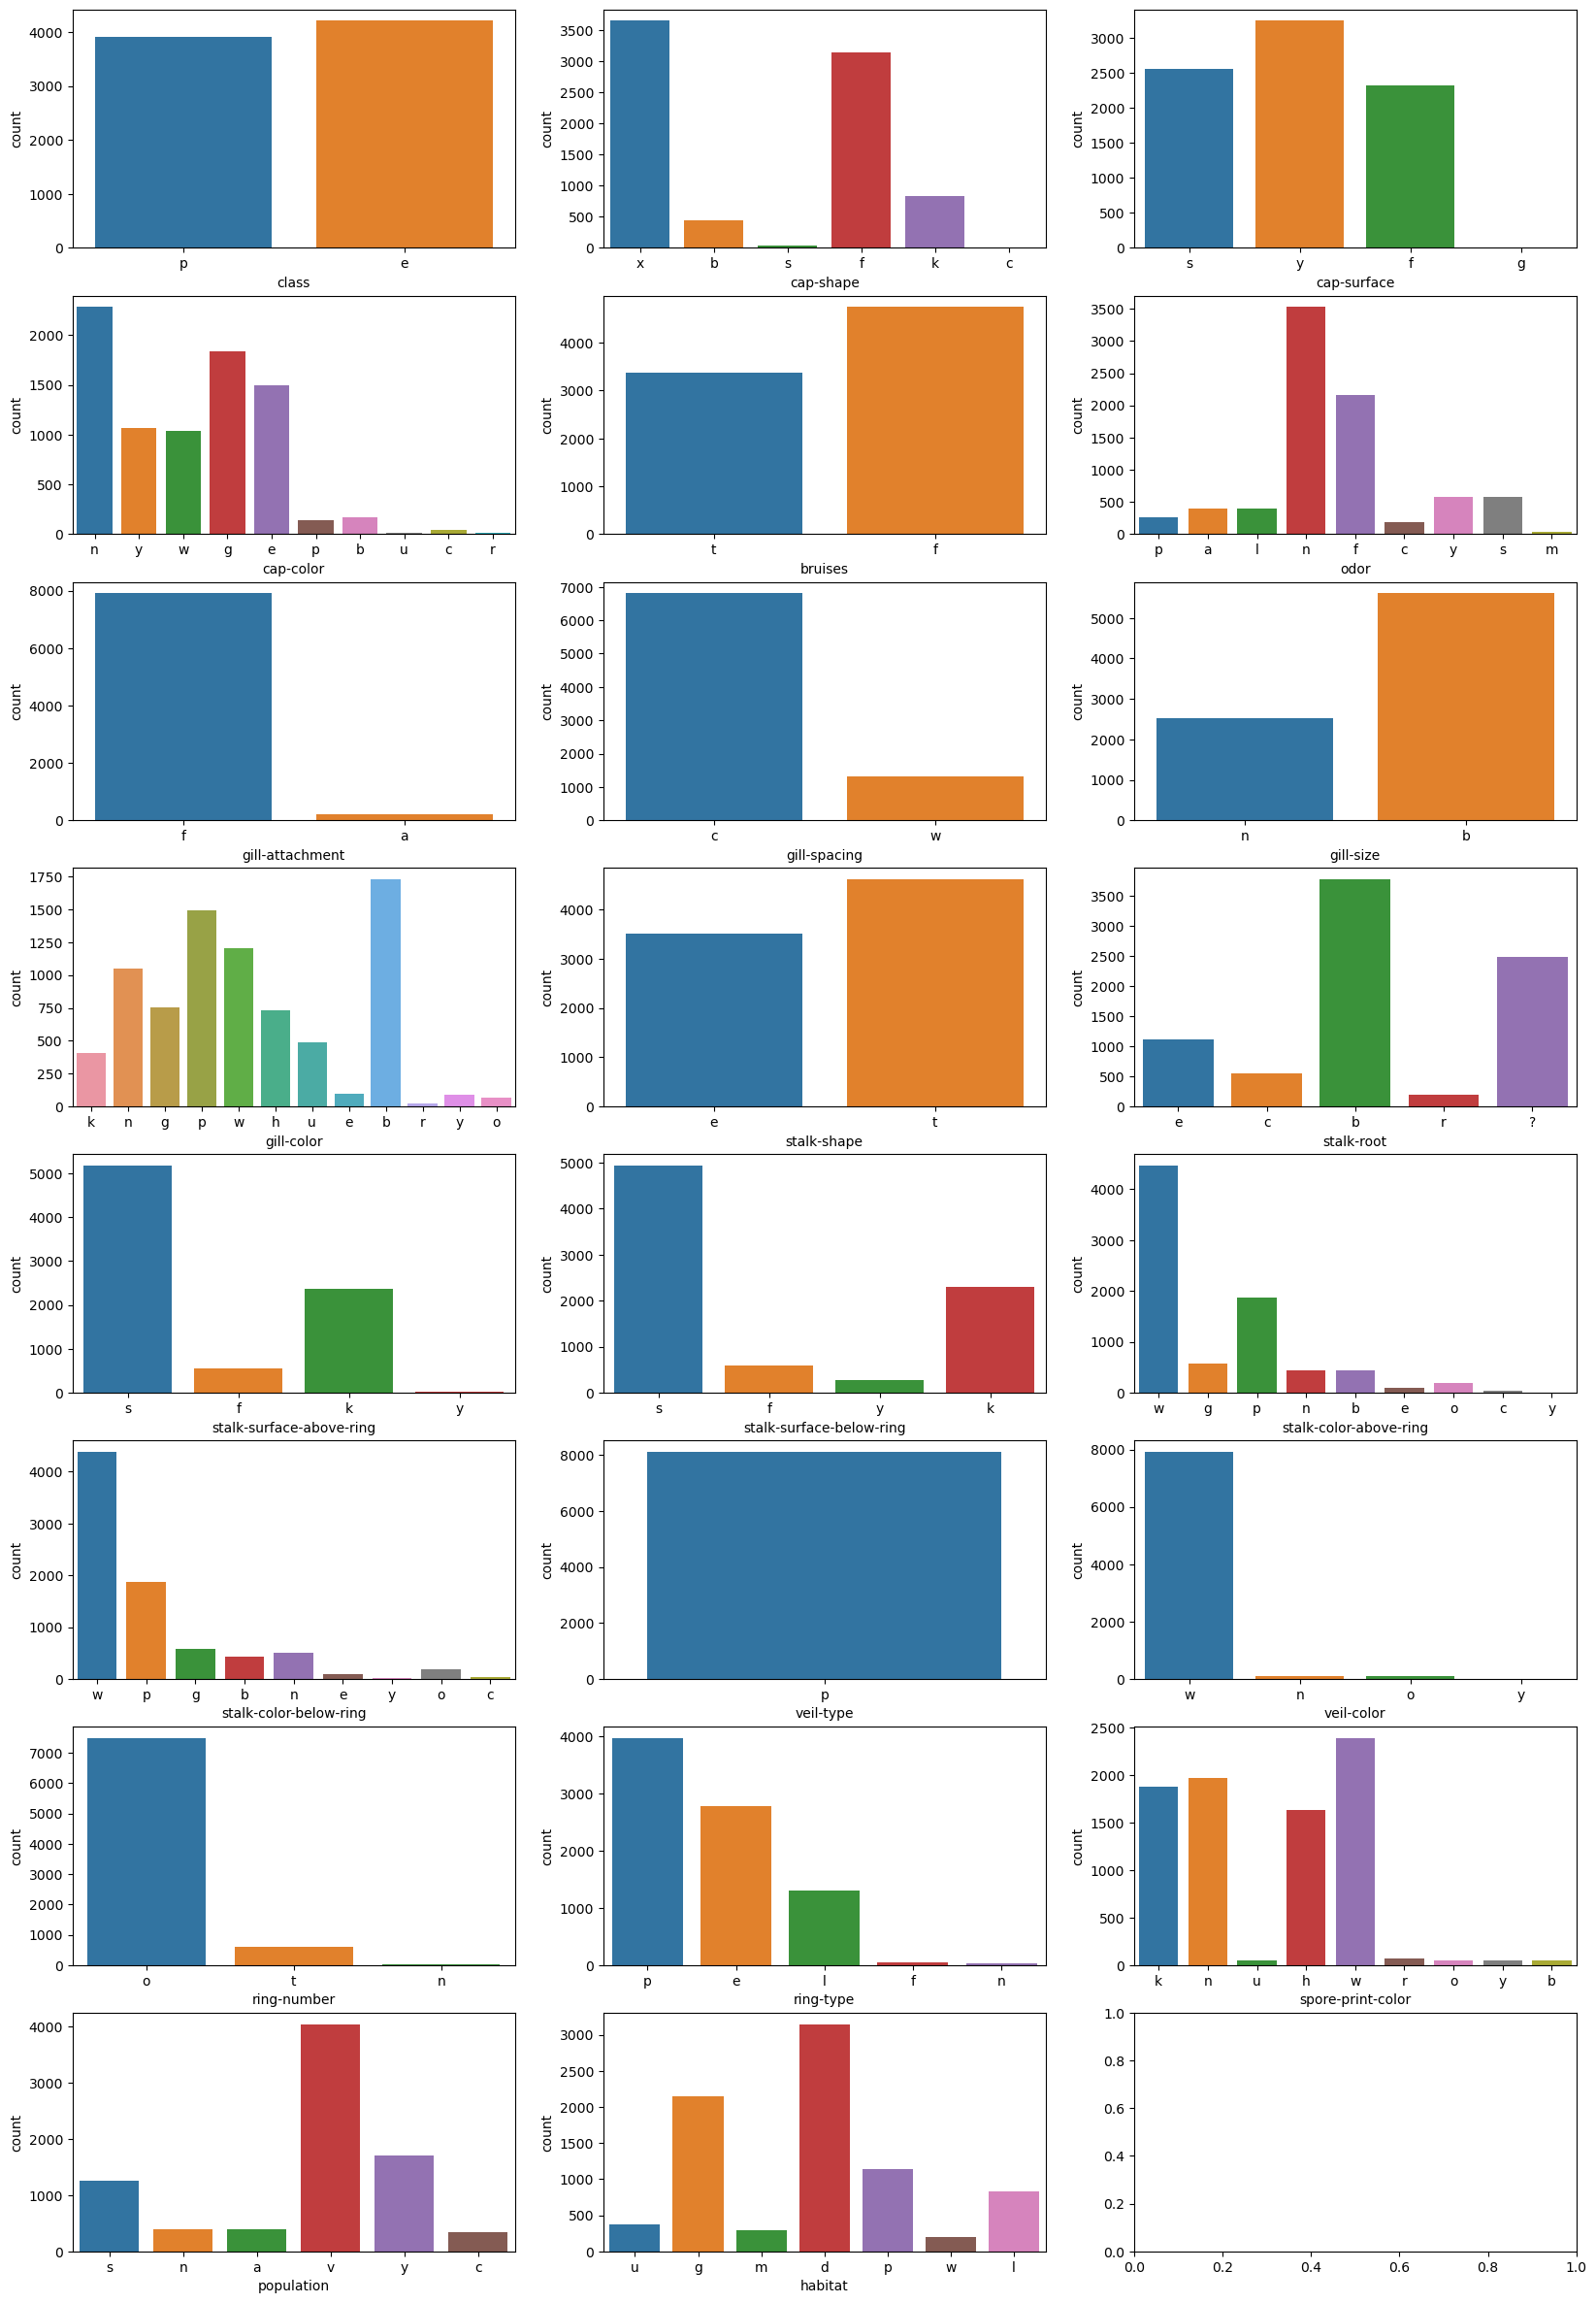

<Figure size 640x480 with 0 Axes>

In [8]:
fig, ax =plt.subplots(8,3, figsize=(20,30))
for col, ax in zip (df.columns,ax.flatten()):
    sns.countplot(x=col, data=df, ax=ax)
    ax.set_label(col)
plt.show()
plt.tight_layout()


- Some categories have very small proportion of classes. eg. Cap color,shape, odor, ring type etc.

In [9]:
## Target Variable distribution

df['class'].value_counts()    # There is no class imbalance. Pie Chart and Count plot shown above.

e    4208
p    3916
Name: class, dtype: int64

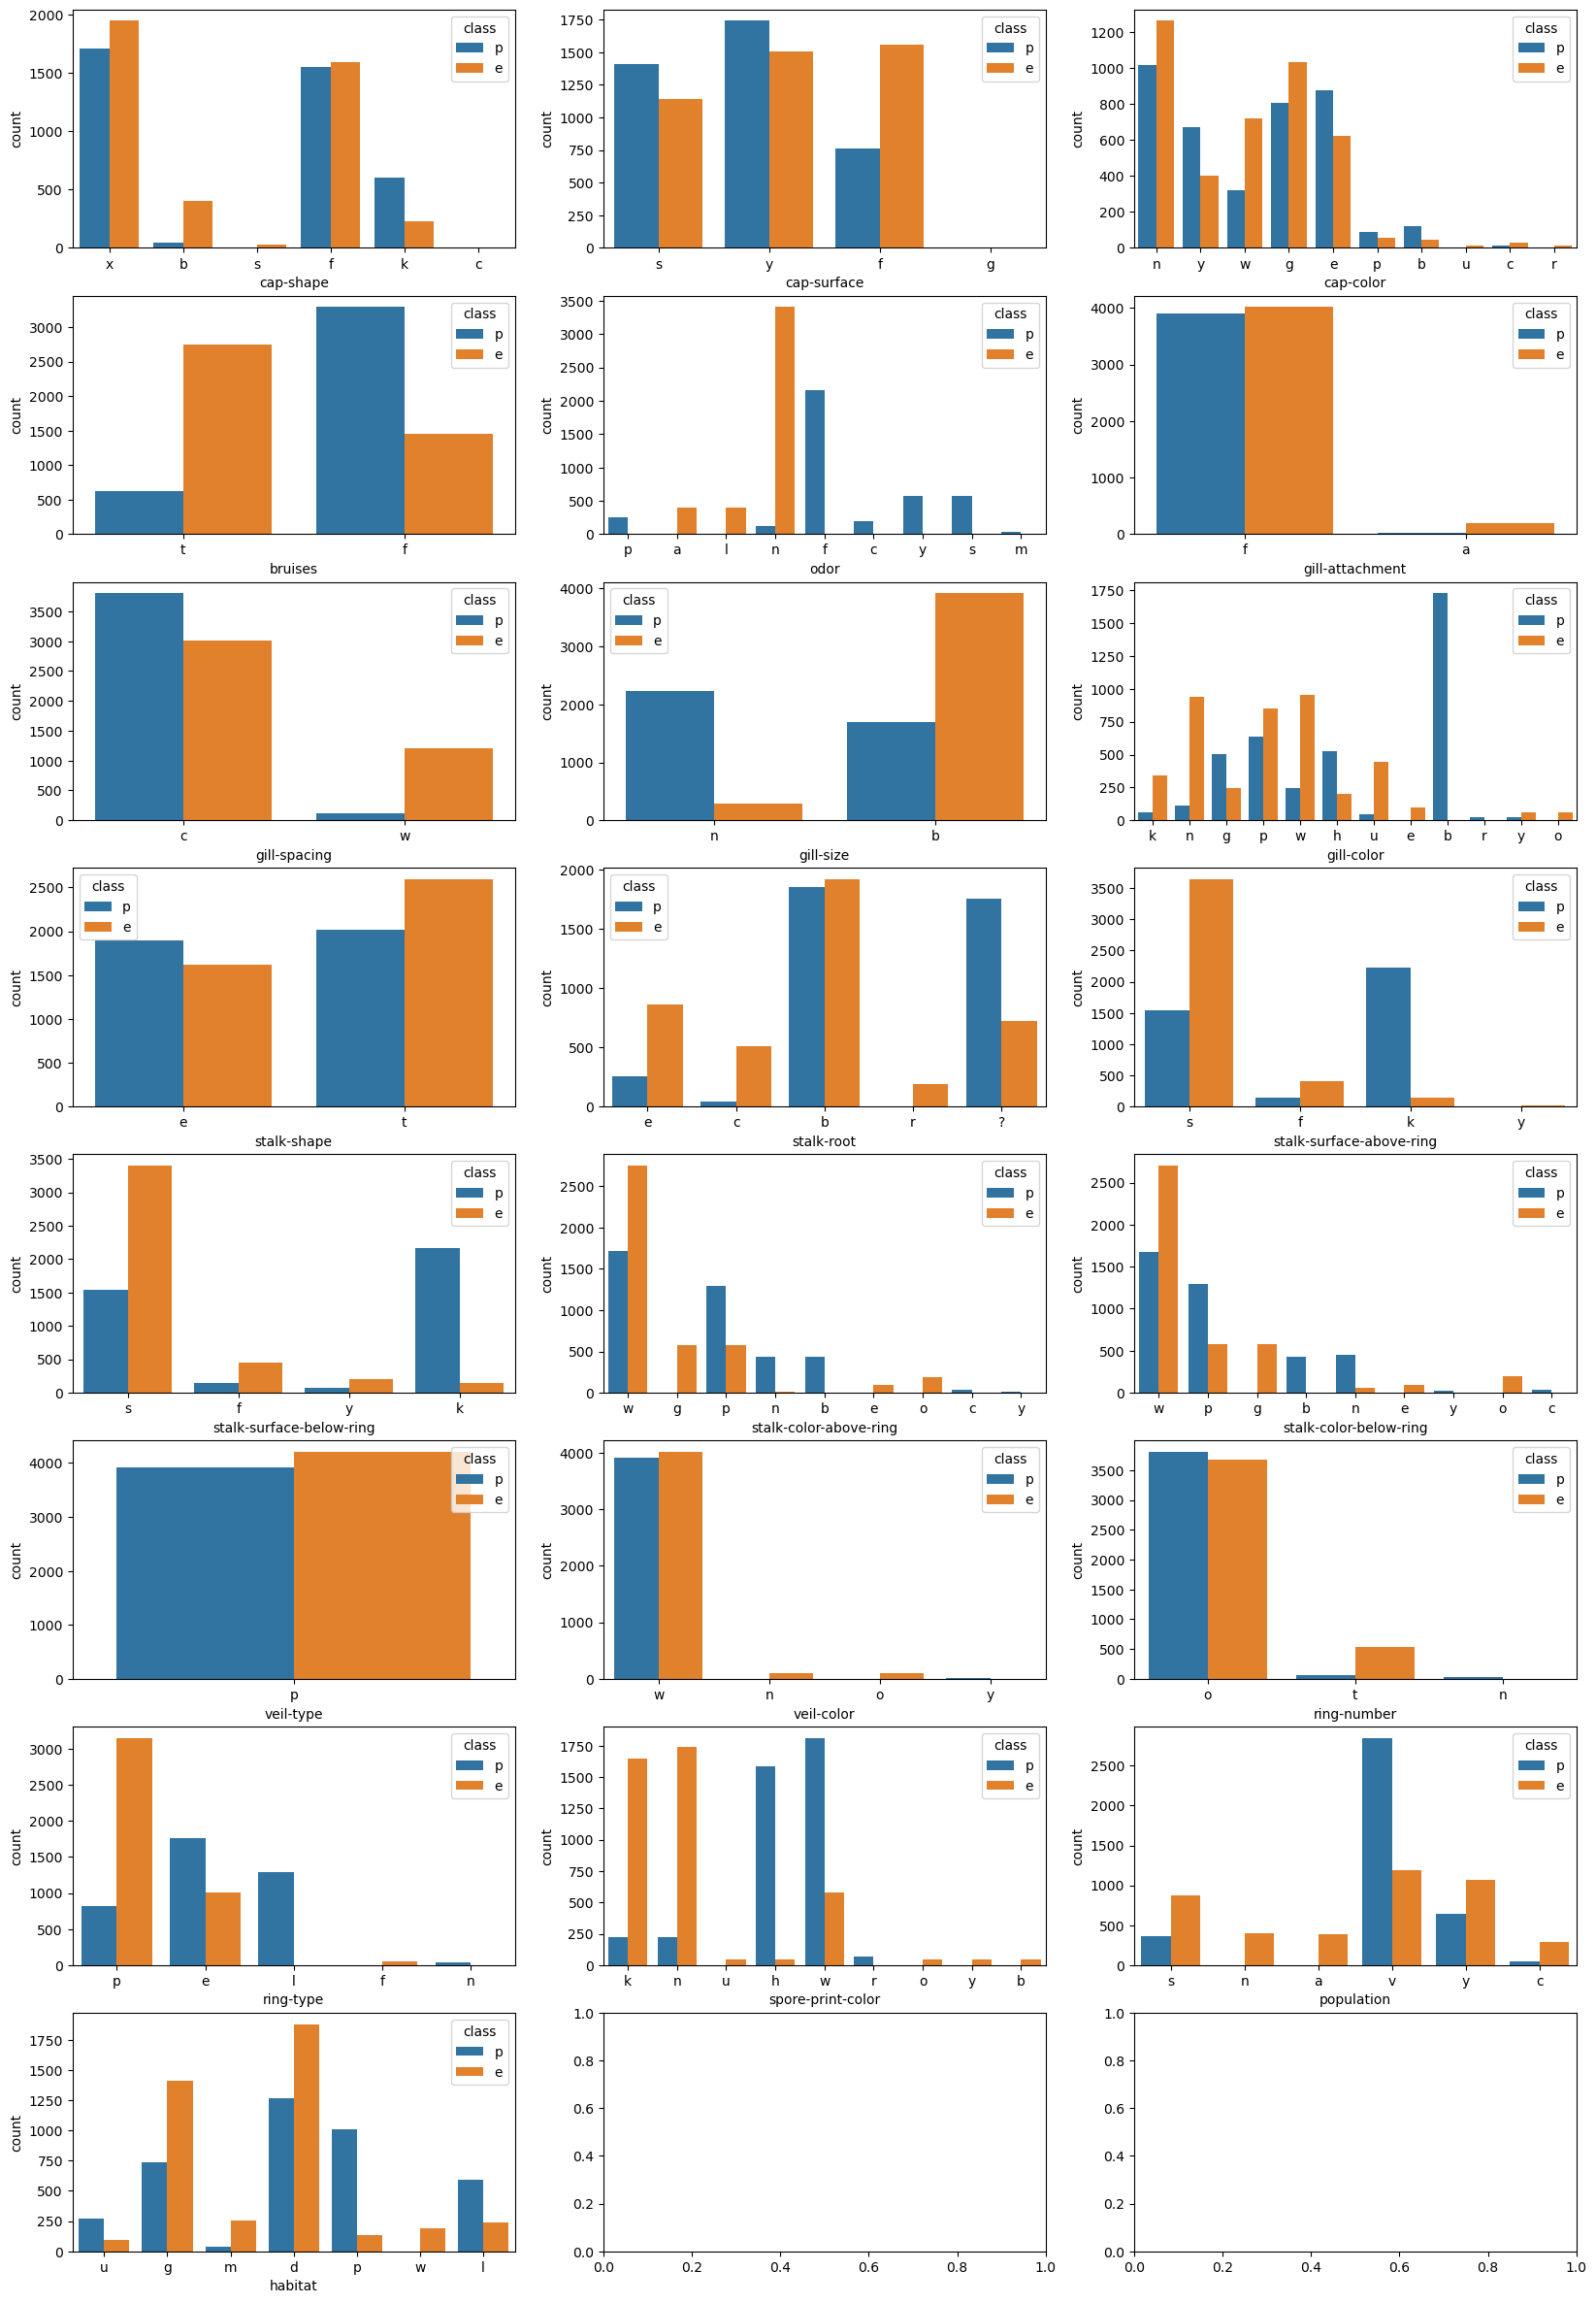

<Figure size 640x480 with 0 Axes>

In [10]:
fig, ax =plt.subplots(8,3, figsize=(20,30))
for col, ax in zip (df.drop('class',axis=1).columns,ax.flatten()):
    sns.countplot(x=col,hue='class', data=df, ax=ax)
    ax.set_label(col)
plt.show()
plt.tight_layout()

- odor a,l, n mostly associated with edible category and remaining odors with poisonous.
- Spore print u,o,y,b,k,n mostly related to edible category while h,w and r with poisonous one.
- veil color n,o for edible and y poisonous. while w has 40:60 proportion.

In [11]:
from scipy.stats import chi2_contingency

for i in df.drop('class',axis=1).columns:
    stat,p,dof,exp_fre = chi2_contingency(pd.crosstab(df[i],df['class']))
    print('p_value for', i+':', p)

p_value for cap-shape: 1.196456568593578e-103
p_value for cap-surface: 5.518427038649143e-68
p_value for cap-color: 6.055814598336574e-78
p_value for bruises: 0.0
p_value for odor: 0.0
p_value for gill-attachment: 5.501707411861009e-31
p_value for gill-spacing: 5.0229776137324786e-216
p_value for gill-size: 0.0
p_value for gill-color: 0.0
p_value for stalk-shape: 4.604746212155192e-20
p_value for stalk-root: 7.702047904943513e-290
p_value for stalk-surface-above-ring: 0.0
p_value for stalk-surface-below-ring: 0.0
p_value for stalk-color-above-ring: 0.0
p_value for stalk-color-below-ring: 0.0
p_value for veil-type: 1.0
p_value for veil-color: 3.320972749169678e-41
p_value for ring-number: 4.23575764172306e-82
p_value for ring-type: 0.0
p_value for spore-print-color: 0.0
p_value for population: 0.0
p_value for habitat: 0.0


- All p values are less than 0.05 showing that all columns have statistically significant association with target variable.

In [13]:
df['class'].unique()

array(['p', 'e'], dtype=object)

In [14]:
# Encoding
df['class'] = df['class'].replace({'p':0,'e':1})

In [19]:
pd.options.display.max_columns=None

In [22]:
df.shape

(8124, 23)

In [23]:
df_cat = df.select_dtypes(include=object)
encoded = pd.get_dummies(df_cat,drop_first=True)
encoded.head()

,cap-shape_c,cap-shape_f,cap-shape_k,cap-shape_s,cap-shape_x,cap-surface_g,cap-surface_s,cap-surface_y,cap-color_c,cap-color_e,cap-color_g,cap-color_n,cap-color_p,cap-color_r,cap-color_u,cap-color_w,cap-color_y,bruises_t,odor_c,odor_f,odor_l,odor_m,odor_n,odor_p,odor_s,odor_y,gill-attachment_f,gill-spacing_w,gill-size_n,gill-color_e,gill-color_g,gill-color_h,gill-color_k,gill-color_n,gill-color_o,gill-color_p,gill-color_r,gill-color_u,gill-color_w,gill-color_y,stalk-shape_t,stalk-root_b,stalk-root_c,stalk-root_e,stalk-root_r,stalk-surface-above-ring_k,stalk-surface-above-ring_s,stalk-surface-above-ring_y,stalk-surface-below-ring_k,stalk-surface-below-ring_s,stalk-surface-below-ring_y,stalk-color-above-ring_c,stalk-color-above-ring_e,stalk-color-above-ring_g,stalk-color-above-ring_n,stalk-color-above-ring_o,stalk-color-above-ring_p,stalk-color-above-ring_w,stalk-color-above-ring_y,stalk-color-below-ring_c,stalk-color-below-ring_e,stalk-color-below-ring_g,stalk-color-below-ring_n,stalk-color-below-ring_o,stalk-color-below-ring_p,stalk-color-below-ring_w,stalk-color-below-ring_y,veil-color_o,veil-color_w,veil-color_y,ring-number_o,ring-number_t,ring-type_f,ring-type_l,ring-type_n,ring-type_p,spore-print-color_h,spore-print-color_k,spore-print-color_n,spore-print-color_o,spore-print-color_r,spore-print-color_u,spore-print-color_w,spore-print-color_y,population_c,population_n,population_s,population_v,population_y,habitat_g,habitat_l,habitat_m,habitat_p,habitat_u,habitat_w
0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0
1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0
2,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0
3,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0
4,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0


In [24]:
encoded.shape     # too many columns made we will try other methods like WOE encoding

(8124, 95)

In [27]:
import category_encoders as ce
e = ce.WOEEncoder(df_cat.columns)
en_data = e.fit_transform(df_cat,df['class'])
en_data.head()

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,0.059527,-0.282192,0.142408,1.410814,-5.620957,-0.042066,-0.306590,-2.112967,1.597276,-0.233689,1.141772,0.790545,0.722356,0.402564,0.403832,0.000018,-0.044628,-0.106064,1.278589,1.919943,0.798380,-1.106642
1,0.059527,-0.282192,-0.589665,1.410814,5.922080,-0.042066,-0.306590,0.767963,1.597276,-0.233689,2.361732,0.790545,0.722356,0.402564,0.403832,0.000018,-0.044628,-0.106064,1.278589,1.976528,5.922080,0.570754
2,2.040185,-0.282192,0.737317,1.410814,5.922080,-0.042066,-0.306590,0.767963,2.043414,-0.233689,2.361732,0.790545,0.722356,0.402564,0.403832,0.000018,-0.044628,-0.106064,1.278589,1.976528,5.922080,1.866277
3,0.059527,-0.217548,0.737317,1.410814,-5.620957,-0.042066,-0.306590,-2.112967,2.043414,-0.233689,1.141772,0.790545,0.722356,0.402564,0.403832,0.000018,-0.044628,-0.106064,1.278589,1.919943,0.798380,-1.106642
4,0.059527,-0.282192,0.172542,-0.887301,3.266502,-0.042066,2.291641,0.767963,1.597276,0.179323,1.141772,0.790545,0.722356,0.402564,0.403832,0.000018,-0.044628,-0.106064,-0.633336,1.976528,5.881362,0.570754


In [29]:
X = en_data.copy()
y = df['class']

In [41]:
# Train-test_split

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=1)
print(X_train.shape,X_test.shape,y_train.shape,y_test.shape)

(5686, 22) (2438, 22) (5686,) (2438,)


In [42]:
# Checking statistically for train test split
import scipy.stats as stats
stats.ttest_ind(X_train,X_test)[1]        

array([0.02448908, 0.75629414, 0.20748624, 0.58453577, 0.56763688,
       0.7627207 , 0.2711532 , 0.74728092, 0.16914416, 0.70121702,
       0.38064488, 0.93894158, 0.6645007 , 0.60455903, 0.82741393,
              nan, 0.7407545 , 0.37302786, 0.60566965, 0.6938895 ,
       0.98452085, 0.83309986])

In [43]:
stats.ttest_ind(y_train,y_test)[1]

0.19395452909734182

In [ ]:
# few categories p value more than 0.05 tried changing random states but no significance. 
# Posiibly due to categorical variables.

### User Defined functions

In [51]:
def performance(model,x,y):
    y_pred = model.predict(x)
    y_pred_proba = model.predict_proba(x)[:,1]
    con_mat = confusion_matrix(y,y_pred)
    print(con_mat)
    print(classification_report(y,y_pred))
    print('Kappa stats:', cohen_kappa_score(y,y_pred))
    print('roc_auc score:',roc_auc_score(y,y_pred_proba))

In [82]:
from sklearn.metrics import roc_curve, accuracy_score
import matplotlib.pyplot as plt

def plot_roc(model, x, y, label):
    y_pred_proba = model.predict_proba(x)[:, 1]
    y_pred = model.predict(x)
    auc_score = accuracy_score(y, y_pred)
    fpr, tpr, _ = roc_curve(y, y_pred_proba)
    
    plt.plot(fpr, tpr, label=label + ' (AUC Score = %0.4f)' % auc_score)
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.0])
    
    plt.plot([0, 1], [0, 1], 'r--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.legend(loc='lower right')
    plt.grid()


### Naive_bayes model

In [68]:
bnb = BernoulliNB()
bnb.fit(X_train,y_train)

BernoulliNB()

In [69]:
performance(bnb,X_train,y_train) 

[[2605  109]
 [  35 2937]]
              precision    recall  f1-score   support

           0       0.99      0.96      0.97      2714
           1       0.96      0.99      0.98      2972

    accuracy                           0.97      5686
   macro avg       0.98      0.97      0.97      5686
weighted avg       0.97      0.97      0.97      5686

Kappa stats: 0.9491846420922733
roc_auc score: 0.9977899848351255


In [71]:
performance(bnb,X_test,y_test) 

[[1153   49]
 [   8 1228]]
              precision    recall  f1-score   support

           0       0.99      0.96      0.98      1202
           1       0.96      0.99      0.98      1236

    accuracy                           0.98      2438
   macro avg       0.98      0.98      0.98      2438
weighted avg       0.98      0.98      0.98      2438

Kappa stats: 0.9532093132881025
roc_auc score: 0.9976125282027258


#### Will prepare base model using decision tree as all variables are categorical

In [44]:
dt = DecisionTreeClassifier(random_state=10)
dt.fit(X_train,y_train)

DecisionTreeClassifier(random_state=10)

In [52]:
performance(dt,X_train,y_train)  # Overfitted Model try hyperparameter tunning

[[2714    0]
 [   0 2972]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2714
           1       1.00      1.00      1.00      2972

    accuracy                           1.00      5686
   macro avg       1.00      1.00      1.00      5686
weighted avg       1.00      1.00      1.00      5686

Kappa stats: 1.0
roc_auc score: 1.0


In [53]:
params = ({'criterion':['gini','entropy'],'max_depth': [6,8], 'min_samples_split':[8,10,12],
    'min_samples_leaf':[6,8,10],'max_features':['log2','sqrt'],'max_leaf_nodes':[6,8]})

dt2 = DecisionTreeClassifier(random_state=10)
dt2_grid = GridSearchCV(dt2,param_grid=params,cv=3,scoring='roc_auc')
dt2_grid.fit(X_train,y_train)
dt2_grid.best_params_

{'criterion': 'entropy',
 'max_depth': 6,
 'max_features': 'log2',
 'max_leaf_nodes': 8,
 'min_samples_leaf': 6,
 'min_samples_split': 8}

In [54]:
dt_tunned =DecisionTreeClassifier(**dt2_grid.best_params_)
dt_tunned.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=6, max_features='log2',
                       max_leaf_nodes=8, min_samples_leaf=6,
                       min_samples_split=8)

In [55]:
performance(dt_tunned,X_train,y_train)

[[2675   39]
 [   0 2972]]
              precision    recall  f1-score   support

           0       1.00      0.99      0.99      2714
           1       0.99      1.00      0.99      2972

    accuracy                           0.99      5686
   macro avg       0.99      0.99      0.99      5686
weighted avg       0.99      0.99      0.99      5686

Kappa stats: 0.9862452156853939
roc_auc score: 0.9979931212565125


In [56]:
performance(dt_tunned,X_test,y_test)

[[1177   25]
 [   0 1236]]
              precision    recall  f1-score   support

           0       1.00      0.98      0.99      1202
           1       0.98      1.00      0.99      1236

    accuracy                           0.99      2438
   macro avg       0.99      0.99      0.99      2438
weighted avg       0.99      0.99      0.99      2438

Kappa stats: 0.9794815273149853
roc_auc score: 0.996807168742495


In [ ]:
### Model is still overfitting. Let us try Ensemble method - Random forest model

In [59]:
rf= RandomForestClassifier(n_estimators=50)
rf.fit(X_train,y_train)

RandomForestClassifier(n_estimators=50)

In [60]:
performance(rf,X_train,y_train)                    # overfitting

[[2714    0]
 [   0 2972]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2714
           1       1.00      1.00      1.00      2972

    accuracy                           1.00      5686
   macro avg       1.00      1.00      1.00      5686
weighted avg       1.00      1.00      1.00      5686

Kappa stats: 1.0
roc_auc score: 1.0


In [64]:
from sklearn.model_selection import RandomizedSearchCV
rf2 = RandomForestClassifier()
params = ({'n_estimators':[50,100,150],'criterion':['gini','entropy'],'max_depth': [6,8], 'min_samples_split':[8,10,12],
    'min_samples_leaf':[6,8,10],'max_features':['log2','sqrt'],'max_leaf_nodes':[6,8]})

rf2_grid = RandomizedSearchCV(rf2,param_distributions=params,cv=5,scoring='roc_auc')
rf2_grid.fit(X_train,y_train)
rf2_grid.best_params_

{'n_estimators': 50,
 'min_samples_split': 8,
 'min_samples_leaf': 6,
 'max_leaf_nodes': 8,
 'max_features': 'log2',
 'max_depth': 6,
 'criterion': 'entropy'}

In [65]:
rf_tunned = RandomForestClassifier(**rf2_grid.best_params_)
rf_tunned.fit(X_train,y_train)

RandomForestClassifier(criterion='entropy', max_depth=6, max_features='log2',
                       max_leaf_nodes=8, min_samples_leaf=6,
                       min_samples_split=8, n_estimators=50)

In [66]:
performance(rf_tunned,X_train,y_train) 

[[2702   12]
 [   0 2972]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2714
           1       1.00      1.00      1.00      2972

    accuracy                           1.00      5686
   macro avg       1.00      1.00      1.00      5686
weighted avg       1.00      1.00      1.00      5686

Kappa stats: 0.9957695865563224
roc_auc score: 0.9999795437842363


In [67]:
performance(rf_tunned,X_test,y_test) 

[[1190   12]
 [   0 1236]]
              precision    recall  f1-score   support

           0       1.00      0.99      0.99      1202
           1       0.99      1.00      1.00      1236

    accuracy                           1.00      2438
   macro avg       1.00      1.00      1.00      2438
weighted avg       1.00      1.00      1.00      2438

Kappa stats: 0.990152598373038
roc_auc score: 0.9999427868331637


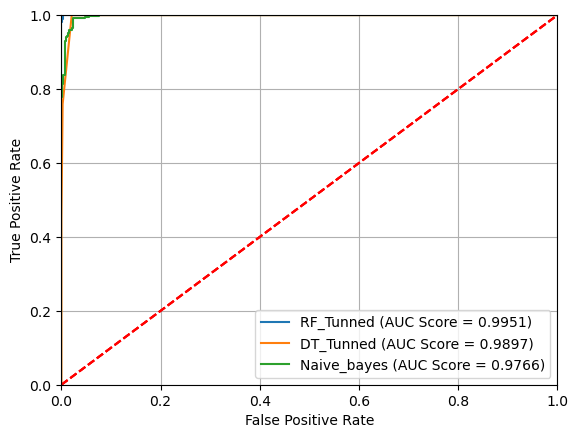

In [86]:
plot_roc (rf_tunned,X_test,y_test,'RF_Tunned')
plot_roc (dt_tunned,X_test,y_test,'DT_Tunned')
plot_roc (bnb,X_test,y_test,'Naive_bayes')

- All the Models are overfitting. We need to run Grid search including more parameters for better results and cross validation to ensure consistent score
- Dataset being too simple and less observations models are overfitted. BernouliClassifier can be applicable in this case. 
- As comparitively less overfitted.

## Best Features by DT

In [88]:
imp = pd.DataFrame({'Features':X_train.columns,
                   'Importance':dt_tunned.feature_importances_})
imp = imp.sort_values(by='Importance',ascending=False).reset_index(drop=True)
imp

,Features,Importance
0,odor,0.507649
1,stalk-surface-above-ring,0.298381
2,gill-spacing,0.104568
3,gill-color,0.039984
4,bruises,0.039458
5,stalk-shape,0.009960
6,stalk-color-below-ring,0.000000
7,population,0.000000
8,spore-print-color,0.000000
9,ring-type,0.000000


- We can Observe that only 6 features are important. Try building model with these 6.

In [92]:
l=list(imp.iloc[0:5]['Features'])
l

['odor', 'stalk-surface-above-ring', 'gill-spacing', 'gill-color', 'bruises']

In [97]:
X_train_new = X_train[l]
X_test_new = X_test[l]

In [98]:
bnb.fit(X_train_new,y_train)

BernoulliNB()

In [99]:
performance(bnb,X_train_new,y_train)

[[2639   75]
 [   0 2972]]
              precision    recall  f1-score   support

           0       1.00      0.97      0.99      2714
           1       0.98      1.00      0.99      2972

    accuracy                           0.99      5686
   macro avg       0.99      0.99      0.99      5686
weighted avg       0.99      0.99      0.99      5686

Kappa stats: 0.9735332439709232
roc_auc score: 0.9936864679529205


In [100]:
performance(bnb,X_test_new,y_test)

[[1157   45]
 [   0 1236]]
              precision    recall  f1-score   support

           0       1.00      0.96      0.98      1202
           1       0.96      1.00      0.98      1236

    accuracy                           0.98      2438
   macro avg       0.98      0.98      0.98      2438
weighted avg       0.98      0.98      0.98      2438

Kappa stats: 0.9630582925395328
roc_auc score: 0.9889901674124572


- Still model is overfitting.